In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
import umap
import torch
import torch.nn as nn
import torch.nn.functional as F
import gc
import sys
from tqdm import tqdm
from pprint import pprint
import pandas as pd
import IPython.display as ipd
import seaborn as sns
from einops import reduce

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"
os.chdir('../../')
os.getcwd()

'/home/bunny/projects/IConNet'

In [5]:
from IConNet.nn.model import M13
from omegaconf import OmegaConf as ocf

model_config_path = 'config/model/m13.yaml'
model_config = ocf.load(model_config_path)
print(model_config)
model = M13(config=model_config,
           n_input=1, n_output=4)
checkpoint_path = '../models_esd4/esd4_m13_best_92epoch.pt'
pretrained_model = torch.load(checkpoint_path)
model.load_state_dict(pretrained_model)

{'name': 'M13', 'description': 'FirConv with fftconv', 'fe': {'n_block': 2, 'n_channel': [128, 32], 'kernel_size': [511, 127], 'stride': [8, 2], 'window_k': [2, 9], 'mel_resolution': 4, 'residual_connection_type': 'stack', 'pooling': 'mean', 'filter_type': 'firwin', 'conv_mode': 'fftconv', 'norm_type': 'LocalResponseNorm'}, 'cls': {'n_block': 2, 'n_hidden_dim': [256, 256], 'norm_type': 'LayerNorm'}}


<All keys matched successfully>

In [6]:
dataset_name = 'iemocap'
experiment_prefix = 'trillsson_fusion'
log_dir = f'../{experiment_prefix}_models/{dataset_name}/'
data_dir = f'../data/data_preprocessed/{dataset_name}/preprocessing/'
sr = 16000
data_x = np.load(f'{data_dir}{dataset_name}.audio16k.npy', allow_pickle=True)
print(len(data_x))

4936


In [7]:
latents = []
model.to(device)
with torch.no_grad():
    for d in data_x[:3]:
        l = model.fe_blocks(torch.tensor(d, device=device)[None, None, :])
        l = F.max_pool1d(l, kernel_size=4, stride=4, padding=2)
        latents.append(l.squeeze().cpu().numpy())

In [8]:
print(latents[0].shape)

(161, 668)


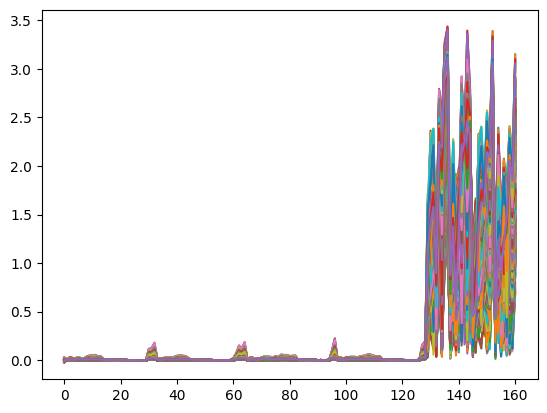

In [10]:
plt.plot(l.cpu().numpy())

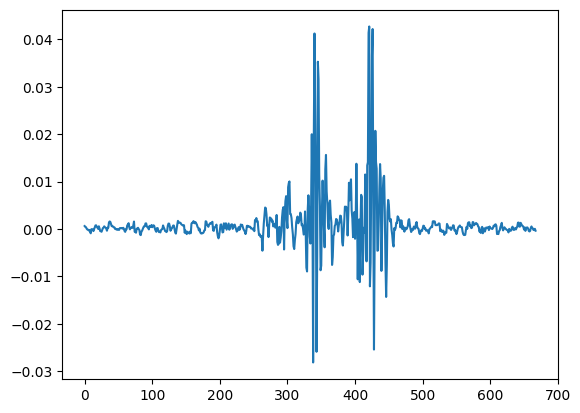

In [11]:
plt.plot(latents[0][0])

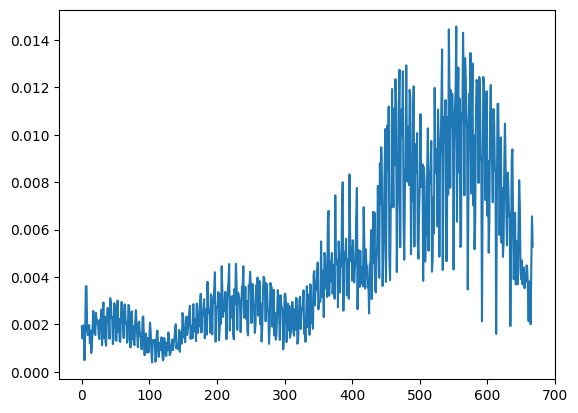

In [12]:
plt.plot(latents[0][1])

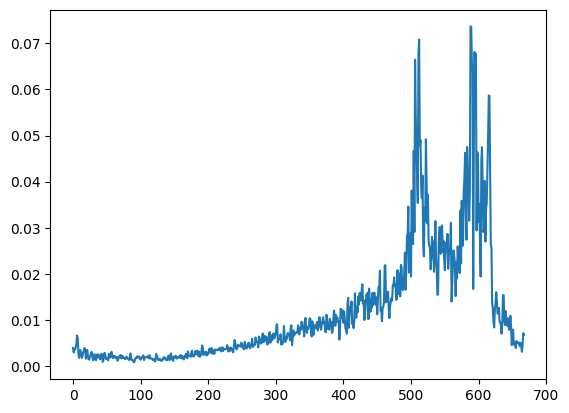

In [13]:
plt.plot(latents[0][10])

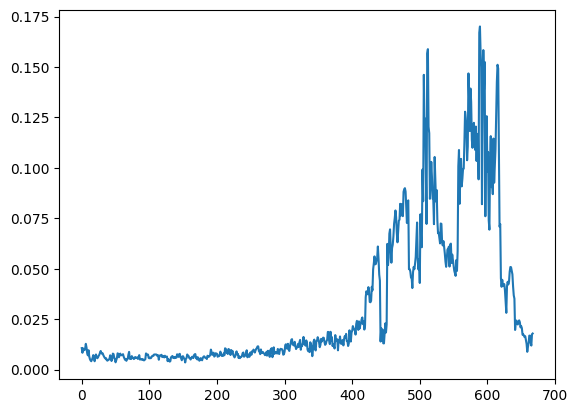

In [14]:
plt.plot(latents[0][30])

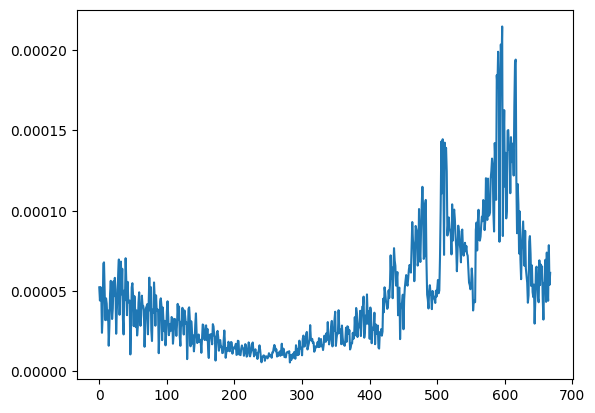

In [17]:
plt.plot(latents[0][125])

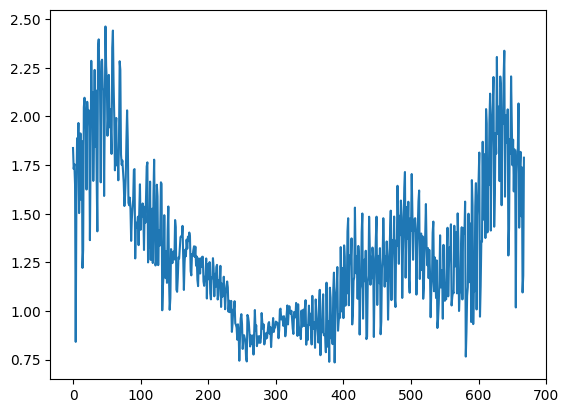

In [15]:
plt.plot(latents[0][130])

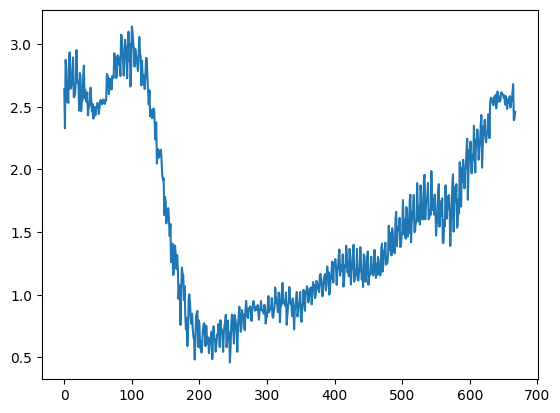

In [16]:
plt.plot(latents[0][133])

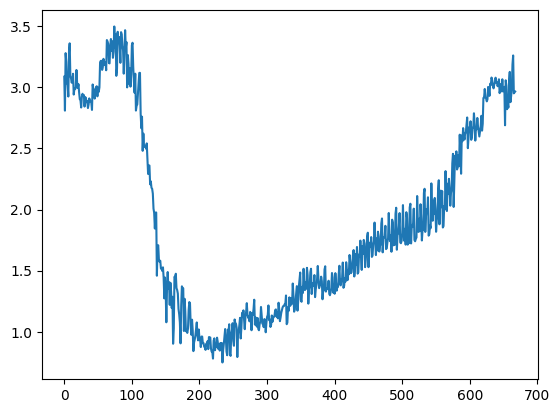

In [18]:
plt.plot(latents[0][-1])

In [19]:
print(len(latents))
print(f'{data_dir}{dataset_name}')

3
../data/data_preprocessed/iemocap/preprocessing/iemocap


In [20]:
latents = []
model.to(device)
with torch.no_grad():
    for d in data_x:
        l = model.fe_blocks(torch.tensor(d, device=device)[None, None, :])
        l = F.max_pool1d(l, kernel_size=4, stride=4, padding=2)
        latents.append(l.squeeze().cpu().numpy())
print(len(latents))

4936


In [21]:
feature_dir = f'../data/data_preprocessed/{dataset_name}/features/'

In [22]:
import pickle

In [23]:
with open(f'{feature_dir}{dataset_name}.embedding.m13_esd_pt92.npy', 'wb') as f:
    pickle.dump(latents, f)

In [24]:
del data_x

In [25]:
emb = np.load(
    f'{feature_dir}{dataset_name}.embedding.m13_esd_pt92.npy', 
    allow_pickle=True)

In [26]:
len(emb)

4936